# **Activity 1: Nhận diện chữ số viết tay (MNIST Dataset)**

**Khai báo thư viện sử dụng**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D

**Load data**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


**Chuẩn hóa dữ liệu input**

In [ ]:
X_train_scaled = np.array(X_train)/255.
X_test_scaled = np.array(X_test)/255.

**Chuẩn hóa dữ liệu output**

In [ ]:
# OnehotVector output
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

**Xây dựng mô hình CNN ban đầu**

In [ ]:
# CNN model
inp = Input(shape = (28,28,1)) # input shape
cnn = Conv2D(filters = 8, kernel_size = 3, activation='relu')(inp)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 16, kernel_size = 4, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 32, kernel_size = 4, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)

f = Flatten()(pooling)

fc1 = Dense(units = 32, activation = 'relu')(f)
fc2 = Dense(units = 16, activation = 'relu')(fc1)
out = Dense(units = 10, activation = 'softmax')(fc2)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                         

**Huấn luyện mô hình ban đầu**

In [ ]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer1, loss='categorical_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train_scaled,y_train,batch_size=64,
                    epochs = 50, validation_data = (X_test_scaled, y_test))

Epoch 1/50
938/938 [==============================] - 23s 7ms/step - loss: 0.5440 - accuracy: 0.8188 - val_loss: 0.1270 - val_accuracy: 0.9635
Epoch 2/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1699 - accuracy: 0.9472 - val_loss: 0.0851 - val_accuracy: 0.9745
Epoch 3/50
938/938 [==============================] - 7s 7ms/step - loss: 0.1259 - accuracy: 0.9606 - val_loss: 0.0794 - val_accuracy: 0.9747
Epoch 4/50
938/938 [==============================] - 7s 8ms/step - loss: 0.1018 - accuracy: 0.9682 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0876 - accuracy: 0.9725 - val_loss: 0.0475 - val_accuracy: 0.9857
Epoch 6/50
938/938 [==============================] - 5s 6ms/step - loss: 0.0788 - accuracy: 0.9751 - val_loss: 0.0417 - val_accuracy: 0.9861
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0704 - accuracy: 0.9779 - val_loss: 0.0379 - val_accuracy: 0.9881
Epoch

**Trực quan hóa kết quả Accuracy và Loss trên tập Train và Test**

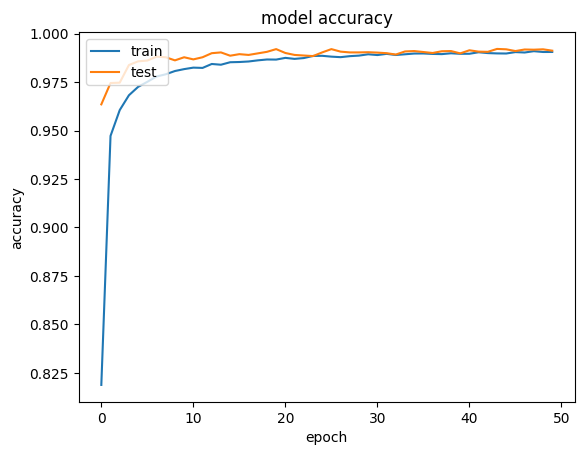

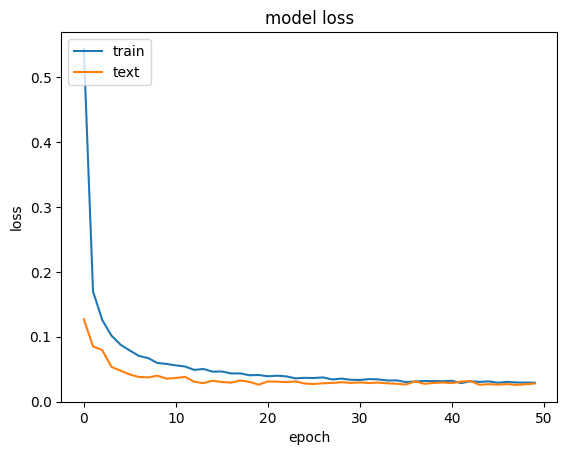

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','text'],loc='upper left')
plt.show()

**Lưu mô hình ban đầu, load mô hình đã lưu từ máy**

In [ ]:
model.save('model1.h5')
from tensorflow.keras.models import load_model
model1 = load_model('/content/model1.h5')

**Load ảnh và sử dụng mô hình đã huấn luyện để nhận diện**

In [ ]:
# import cv2
# img = cv2.imread('/content/so2.png')
# print(img.shape)
# plt.imshow(img)

In [ ]:
# gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_new = cv2.resize(gray_img,(28,28))
# print(gray_img.shape)
# plt.imshow(img_new,cmap = 'gray')

In [ ]:
# img_scaled = np.array([img_new/255.])
# print(img_scaled.shape)
# y_hat = model1.predict(img_scaled)
# print(y_hat)
# print(np.argmax(y_hat))

**Tính y dự đoán từ mô hình ban đầu đã lưu**

In [ ]:
y_hat = model1.predict(X_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_hat.shape)
print(y_test.shape)

(10000, 10)
(10000, 10)


**Lấy argmax của y dự đoán và y test**

In [ ]:
y_test = np.argmax(y_test, axis=1)
y_hat = np.argmax(y_hat, axis=1)

# **Activity 2**

### **Sử dụng classification_report trong thư viện Sklearn đánh giá kết quả mô hình ban đầu dựa trên kết quả dự đoán tập test**

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(y_test, y_hat,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### **Sử dụng Confusion_matrix trong thư viện Sklearn biểu diễn kết quả dự đoán trên tập test**

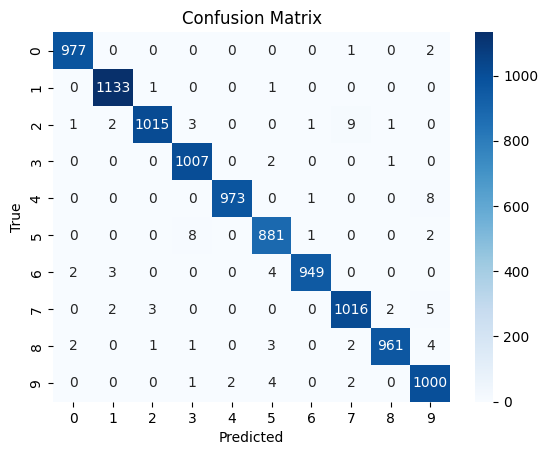

In [ ]:
import sklearn.metrics
import seaborn as sn

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_hat)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Load data, chuẩn hoá input**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_scaled = np.array(X_train)/255.
X_test_scaled = np.array(X_test)/255.

**Chuẩn hoá output**

In [ ]:
# OnehotVector output
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

### **Thay đổi mạng CNN theo ý kiến của riêng mình sao cho kết quả tốt nhất**

In [ ]:
# Khai báo thư viện BatchNormalization
from tensorflow.keras.layers import BatchNormalization

inp = Input(shape = (28, 28, 1))

cnn = Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same')(inp) # Thêm padding
cnn = BatchNormalization()(cnn)
cnn = Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same')(cnn)
cnn = BatchNormalization()(cnn)
pooling = MaxPooling2D(pool_size = (2, 2))(cnn)

cnn = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(pooling)
cnn = BatchNormalization()(cnn)
cnn = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(cnn)
cnn = BatchNormalization()(cnn)
pooling = MaxPooling2D(pool_size = (2, 2))(cnn)

cnn = Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same')(pooling)
cnn = BatchNormalization()(cnn)
cnn = Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same')(cnn)
cnn = BatchNormalization()(cnn)
pooling = MaxPooling2D(pool_size = (2, 2))(cnn)

cnn = Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same')(pooling)
cnn = BatchNormalization()(cnn)
cnn = Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same')(cnn)
cnn = BatchNormalization()(cnn)
pooling = MaxPooling2D(pool_size = (2, 2))(cnn)

f = Flatten()(pooling)

fc1 = Dense(units = 512, activation = 'relu') (f)
drop = Dropout(0.2)(fc1)
fc2 = Dense(units = 256, activation = 'relu') (drop)
fc3 = Dense(units = 128, activation = 'relu') (fc2)
fc4 = Dense(units = 64, activation = 'relu') (fc3)
fc5 = Dense(units = 32, activation = 'relu') (fc4)
out = Dense(units = 10, activation = 'softmax') (fc5)

model = Model(inputs=inp, outputs=out)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_44 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 14, 14, 32)       0   

**Huấn luyện mô hình sau khi thay đổi cấu trúc mạng CNN**

In [ ]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer1, loss='categorical_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train_scaled,y_train,batch_size=64,
                    epochs = 50, validation_data = (X_test_scaled, y_test))

Epoch 1/50
938/938 [==============================] - 20s 13ms/step - loss: 0.1407 - accuracy: 0.9610 - val_loss: 0.0402 - val_accuracy: 0.9885
Epoch 2/50
938/938 [==============================] - 11s 11ms/step - loss: 0.0539 - accuracy: 0.9865 - val_loss: 0.0574 - val_accuracy: 0.9839
Epoch 3/50
938/938 [==============================] - 11s 12ms/step - loss: 0.0449 - accuracy: 0.9888 - val_loss: 0.0534 - val_accuracy: 0.9858
Epoch 4/50
938/938 [==============================] - 11s 12ms/step - loss: 0.0401 - accuracy: 0.9904 - val_loss: 0.0550 - val_accuracy: 0.9871
Epoch 5/50
938/938 [==============================] - 12s 13ms/step - loss: 0.0330 - accuracy: 0.9922 - val_loss: 0.0262 - val_accuracy: 0.9934
Epoch 6/50
938/938 [==============================] - 11s 11ms/step - loss: 0.0279 - accuracy: 0.9931 - val_loss: 0.0399 - val_accuracy: 0.9908
Epoch 7/50
938/938 [==============================] - 11s 12ms/step - loss: 0.0279 - accuracy: 0.9934 - val_loss: 0.0257 - val_accuracy:

**Trực quan hóa kết quả Accuracy và Loss trên tập Train và Test đối với mô hình mới**

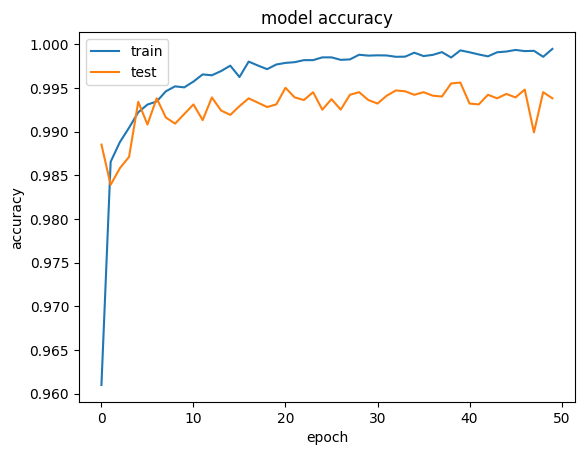

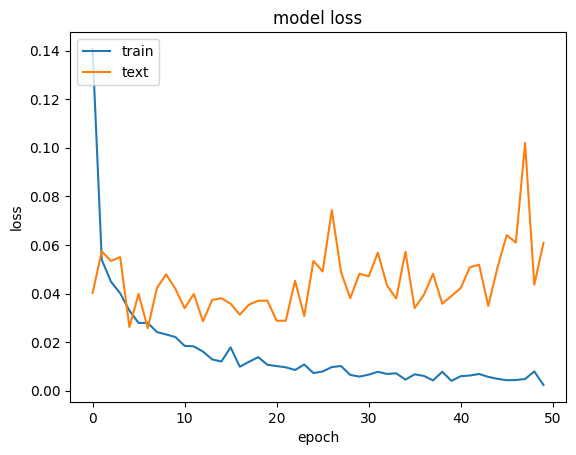

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','text'],loc='upper left')
plt.show()

**Lưu mô hình mới**

In [ ]:
model.save('model2.h5')
from tensorflow.keras.models import load_model
model2 = load_model('/content/model2.h5')

**Tính y dự đoán từ mô hình mới đã lưu, lấy argmax của y dự đoán và y test**

In [ ]:
y_hat = model2.predict(X_test_scaled)
y_test = np.argmax(y_test, axis=1)
y_hat = np.argmax(y_hat, axis=1)

313/313 [==============================] - 2s 5ms/step


### **Sử dụng classification_report trong thư viện Sklearn đánh giá kết quả mô hình mới dựa trên kết quả dự đoán tập test**

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(y_test, y_hat,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### **Sử dụng Confusion_matrix trong thư viện Sklearn biểu diễn kết quả dự đoán trên tập test**

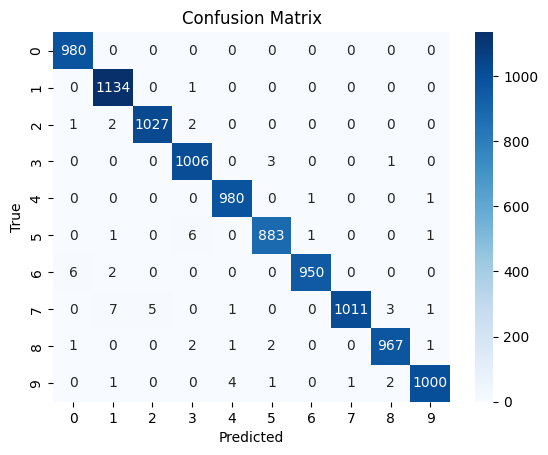

In [ ]:
import sklearn.metrics
import seaborn as sn

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_hat)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()